In [1]:
%matplotlib inline
import lightroot

In [2]:
sample_time_frame = 0
stack = lightroot.io.get_stack(sample_time_frame)
#max_int = lightroot.io.get_max_int(sample_time_frame)

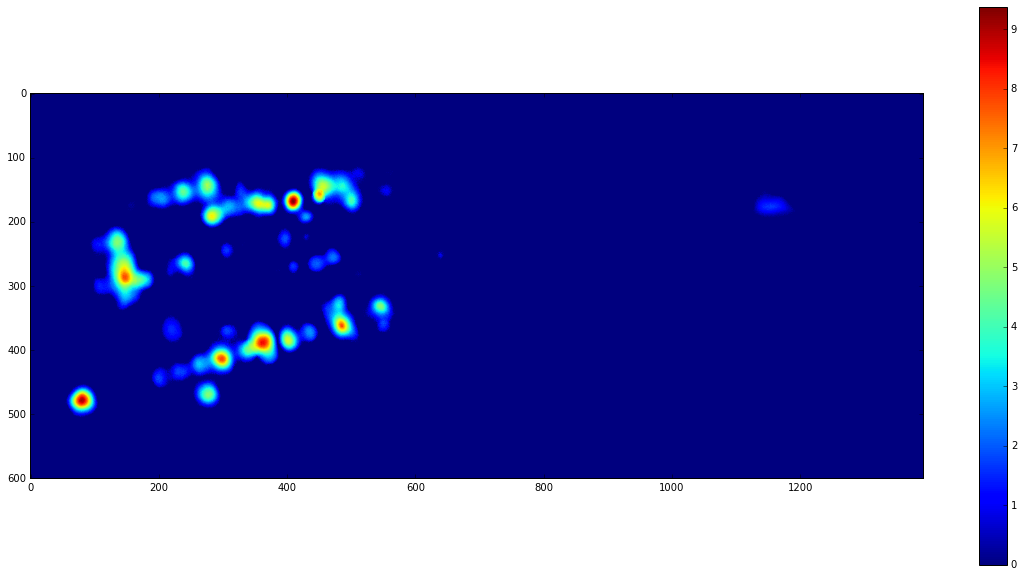

In [3]:
#blobs=lightroot.blobs.detect(stack) does the following steps
sharpened = lightroot.blobs.sharpen(stack)
lightroot.io.plotimg(sharpened)

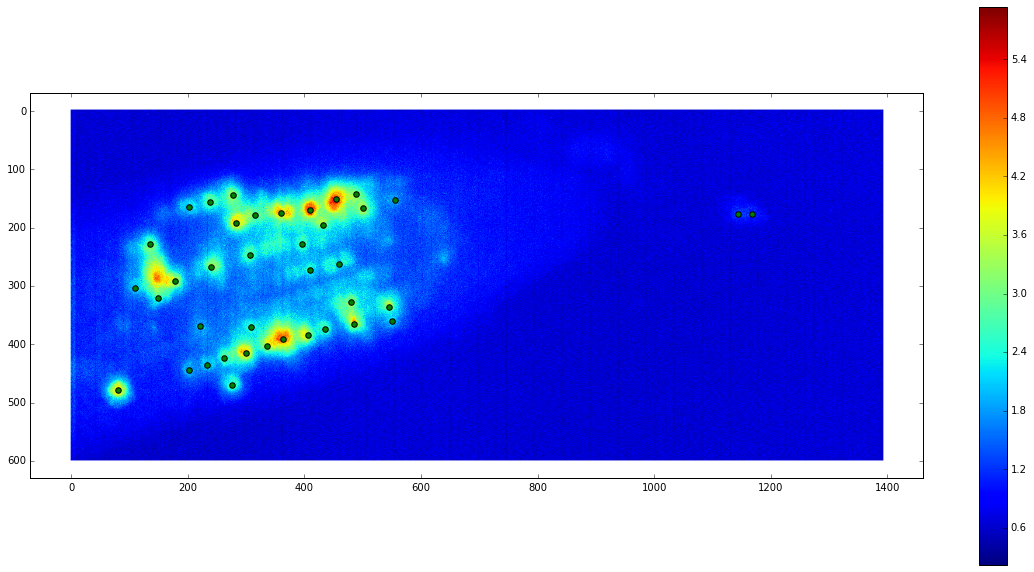

In [4]:
markers = lightroot.blobs.blob_labels(sharpened)
blobs = lightroot.blobs.blob_centroids(markers)
lightroot.io.overlay_blobs(stack,blobs)

In [5]:
#lightroot.process_files(1)